# EXPLORE Data Science Academy Classification Hackathon

© Explore Data Science Academy

# Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government



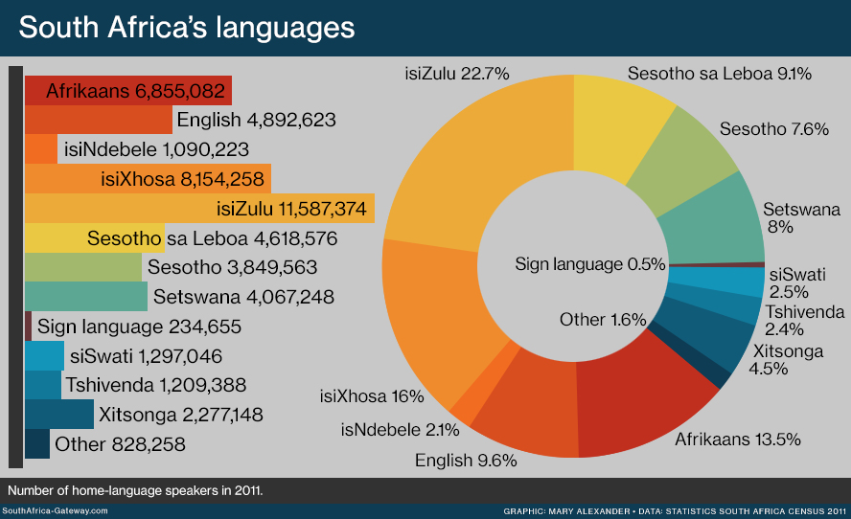

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

In [33]:
# Imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.pipeline import Pipeline

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
import string

# Classification models
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
import xgboost as xgb

# Hyperparameter tunning methods
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, log_loss

# Imports for data visualisation
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [34]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

## Exploratory Data Analysis (EDA)

In [35]:
#Data frame summary 
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [36]:
train.shape

(33000, 2)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [38]:
train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [39]:
# Check for missing values
train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [40]:
vectorizer = TfidfVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 1))
X = vectorizer.fit_transform(train['text'])

y = train['lang_id']

In [41]:
#STAND.
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state =42 )

## Modelling 

##### Logistic Regression Model

In [43]:
lm_full = LogisticRegression()

In [44]:
lm_full.fit(X_train, y_train)

LogisticRegression()

In [45]:
pred_lm_full = lm_full.predict(X_test)

In [46]:
y = f1_score(y_test, pred_lm_full, average = None)

In [47]:
#linear support 

##### XGBoost Model

In [48]:
xgb_full = xgb.XGBClassifier()

In [49]:
xgb_full.fit(X_train, y_train)

[23:28:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [50]:
pred_xgb_full = xgb_full.predict(X_test)

In [51]:
y = f1_score(y_test, pred_xgb_full, average = None)
y

array([0.9929078 , 0.93819334, 0.95489891, 0.98119122, 0.99019608,
       0.97508897, 0.97829716, 1.        , 1.        , 0.95394737,
       0.9376054 ])

##### Decision Trees

In [52]:
dc_full = DecisionTreeClassifier()

In [53]:
dc_full.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
pred_dc_full = dc_full.predict(X_test)

In [55]:
y = f1_score(y_test, pred_dc_full, average = None)

In [56]:
y_test.value_counts()

nbl    327
nso    322
ven    322
xho    313
sot    307
eng    297
tsn    297
zul    295
ssw    286
afr    281
tso    253
Name: lang_id, dtype: int64

### LinearSVC

In [57]:
n_full = LinearSVC()


In [58]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.9954545454545455


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      0.99      0.99       281
         eng       0.99      1.00      0.99       297
         nbl       1.00      0.99      1.00       327
         nso       1.00      0.98      0.99       322
         sot       0.99      1.00      1.00       307
         ssw       1.00      1.00      1.00       286
         tsn       1.00      1.00      1.00       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       1.00      1.00      1.00       313
         zul       0.99      1.00      0.99       295

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [59]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.9954545454545455


Classification Report:

               precision    recall  f1-score   support

         afr       1.00      0.99      0.99       281
         eng       0.99      1.00      0.99       297
         nbl       1.00      0.99      1.00       327
         nso       1.00      0.98      0.99       322
         sot       0.99      1.00      1.00       307
         ssw       1.00      1.00      1.00       286
         tsn       1.00      1.00      1.00       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       1.00      1.00      1.00       313
         zul       0.99      1.00      0.99       295

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



## Kaggle submission 

In [60]:
#Data Engineering
#X_test = vectorizer.transform(test['text'])

In [61]:
#prediction_test = xgb_full.predict(X_test)

In [66]:
#p = prediction_test

In [63]:
#lang_id = pd.DataFrame(p, columns = ['lang_id'])
#index = pd.DataFrame({'index': test['index']})

In [64]:
#sample1 = index.join(lang_id)

In [65]:
#sample1.to_csv('sample3.csv', index=False)